# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# pip install citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/geo/1.0/direct?q={city}&limit=5&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        latitude = response.json()[0]["lat"]
        longitude = response.json()[0]["lon"]
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params={'lat': latitude, 'lon': longitude, 'appid': weather_api_key, 'units': 'metric'}).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hechuan
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | kurchatov
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | weno
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | mahibadhoo
Processing Record 20 of Set 1 | aranda de duero
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | puerto natales
Pr

Processing Record 32 of Set 4 | wamba
Processing Record 33 of Set 4 | karatau
Processing Record 34 of Set 4 | hammerfest
Processing Record 35 of Set 4 | kazalinsk
Processing Record 36 of Set 4 | urengoy
Processing Record 37 of Set 4 | anta
Processing Record 38 of Set 4 | sarupathar
Processing Record 39 of Set 4 | karbala
Processing Record 40 of Set 4 | ballina
Processing Record 41 of Set 4 | toamasina
Processing Record 42 of Set 4 | erenhot
Processing Record 43 of Set 4 | ringkobing
Processing Record 44 of Set 4 | magadan
Processing Record 45 of Set 4 | manta
Processing Record 46 of Set 4 | lensk
Processing Record 47 of Set 4 | kish
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | labrador city
Processing Record 0 of Set 5 | itaituba
Processing Record 1 of Set 5 | susuman
Processing Record 2 of Set 5 | vilyuchinsk
Processing Record 3 of Set 5 | murun-kuren
Processing Record 4 of Set 5 | korsakov
Processing Record 5 of Set 5 | chulakkurgan
City not found. Skipping.

Processing Record 21 of Set 8 | klyuchi
Processing Record 22 of Set 8 | talara
Processing Record 23 of Set 8 | tazacorte
Processing Record 24 of Set 8 | bryan
Processing Record 25 of Set 8 | puerto rosario
Processing Record 26 of Set 8 | grootfontein
Processing Record 27 of Set 8 | remire-montjoly
Processing Record 28 of Set 8 | krasnopavlivka
Processing Record 29 of Set 8 | vorgashor
Processing Record 30 of Set 8 | pacocha
Processing Record 31 of Set 8 | pudozh
Processing Record 32 of Set 8 | jahangirabad
Processing Record 33 of Set 8 | simanggang
Processing Record 34 of Set 8 | tikhvin
Processing Record 35 of Set 8 | gonzalez
Processing Record 36 of Set 8 | posse
Processing Record 37 of Set 8 | lebu
Processing Record 38 of Set 8 | ngerengere
Processing Record 39 of Set 8 | whakatane
Processing Record 40 of Set 8 | yatou
Processing Record 41 of Set 8 | miranda
Processing Record 42 of Set 8 | cascais
Processing Record 43 of Set 8 | olyokminsk
Processing Record 44 of Set 8 | cuamba
Proc

Processing Record 11 of Set 12 | chiquimulilla
Processing Record 12 of Set 12 | tucupita
Processing Record 13 of Set 12 | negombo
Processing Record 14 of Set 12 | tallkalakh
City not found. Skipping...
Processing Record 15 of Set 12 | arenapolis
Processing Record 16 of Set 12 | mahalapye
Processing Record 17 of Set 12 | saint lucia
Processing Record 18 of Set 12 | manjeshvar
City not found. Skipping...
Processing Record 19 of Set 12 | vadso
Processing Record 20 of Set 12 | thunder bay
Processing Record 21 of Set 12 | tavrichanka
Processing Record 22 of Set 12 | tam ky
Processing Record 23 of Set 12 | rabo de peixe
Processing Record 24 of Set 12 | la palma
Processing Record 25 of Set 12 | lazaro cardenas
Processing Record 26 of Set 12 | hospet
Processing Record 27 of Set 12 | farafangana
Processing Record 28 of Set 12 | preobrazheniye
Processing Record 29 of Set 12 | tidjikja
Processing Record 30 of Set 12 | fuvahmulah
Processing Record 31 of Set 12 | novaya igirma
Processing Record 32 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9663,-42.0244,26.10,85,95,8.08,BR,1707868347
1,hermanus,-34.4175,19.2361,15.47,88,6,1.90,ZA,1707868348
2,port-aux-francais,-49.3498,70.2200,7.85,90,100,9.51,TF,1707868348
3,kone,-21.0608,164.8619,30.75,62,12,2.31,NC,1707868348
4,tiksi,71.6366,128.8685,-24.43,99,100,1.97,RU,1707868349


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9663,-42.0244,26.10,85,95,8.08,BR,1707868347
1,hermanus,-34.4175,19.2361,15.47,88,6,1.90,ZA,1707868348
2,port-aux-francais,-49.3498,70.2200,7.85,90,100,9.51,TF,1707868348
3,kone,-21.0608,164.8619,30.75,62,12,2.31,NC,1707868348
4,tiksi,71.6366,128.8685,-24.43,99,100,1.97,RU,1707868349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

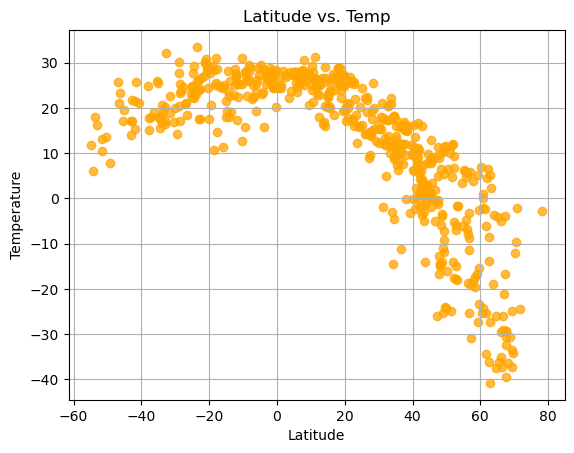

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', facecolor = 'orange', edgecolor = 'orange', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

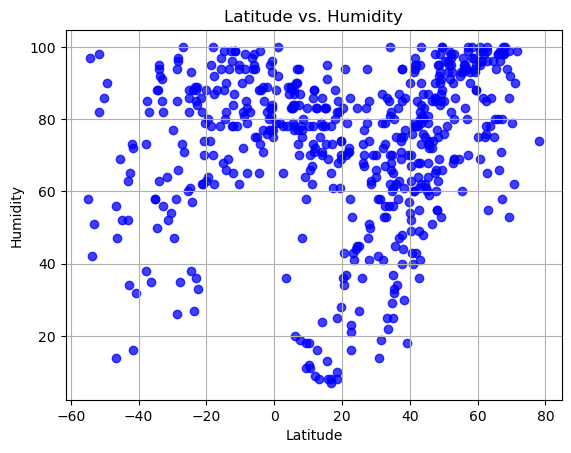

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', facecolor = 'blue', edgecolor = 'blue', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

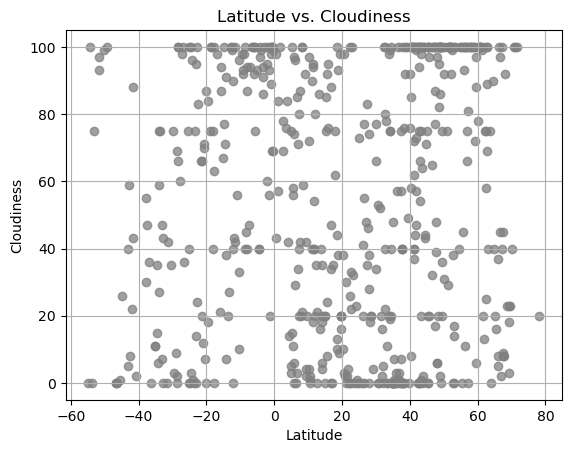

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', facecolor = 'grey', edgecolor = 'grey', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

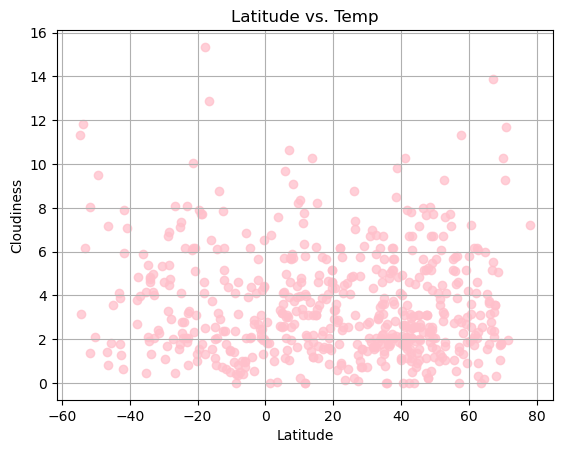

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', facecolor = 'pink', edgecolor = 'pink', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = (x_values * slope) + intercept
    equation = f' y={round(slope,2)}x + {round(intercept,2)}'
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(equation, (min(x_values), max(y_values)), color = "red", fontsize = 10)
    print(f'The r-value is: {rvalue}')



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tiksi,71.6366,128.8685,-24.43,99,100,1.97,RU,1707868349
5,georgetown,6.8137,-58.1624,27.16,90,85,3.01,GY,1707868349
7,dudinka,69.4061,86.1751,-37.38,99,23,1.79,RU,1707868350
9,hechuan,29.9747,106.2722,12.27,70,77,0.71,CN,1707868350
10,anadyr,64.7317,177.5061,-25.91,75,40,6.00,RU,1707868351


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9663,-42.0244,26.10,85,95,8.08,BR,1707868347
1,hermanus,-34.4175,19.2361,15.47,88,6,1.90,ZA,1707868348
2,port-aux-francais,-49.3498,70.2200,7.85,90,100,9.51,TF,1707868348
3,kone,-21.0608,164.8619,30.75,62,12,2.31,NC,1707868348
6,west island,-12.1459,96.8423,27.03,78,40,5.14,CC,1707868349


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8581710116041066


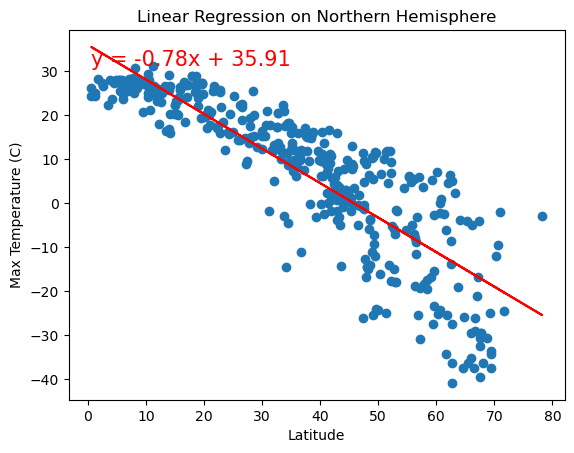

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)

# Calculate regression line
regression_line = (slope * x_values) + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression on Northern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)

print(f'The r-value is: {rvalue}')

plt.show()


The r-value is: 0.529997626293432


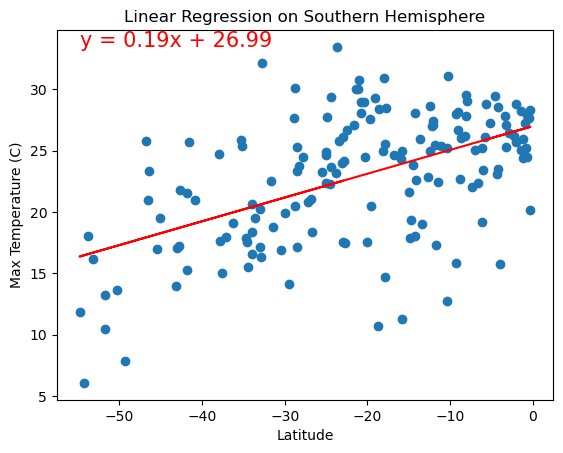

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression on Southern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)

print(f'The r-value is: {rvalue}')


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3402472949410793


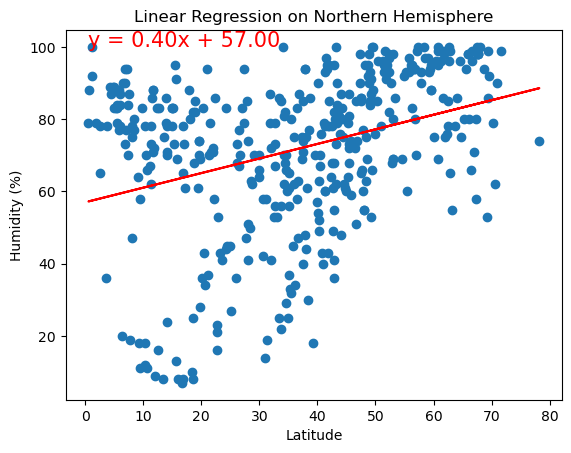

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression on Northern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.4150162237514941


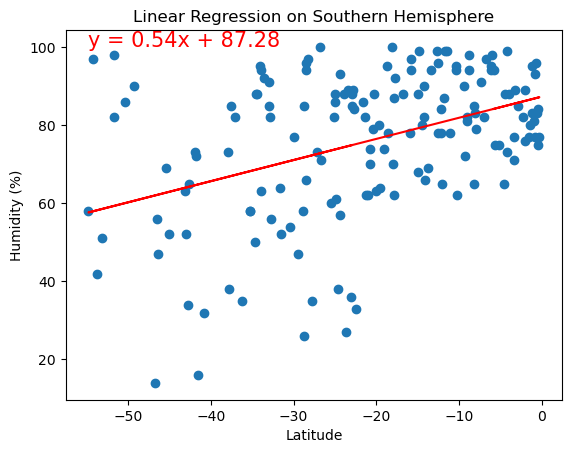

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression on Southern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20620011616499134


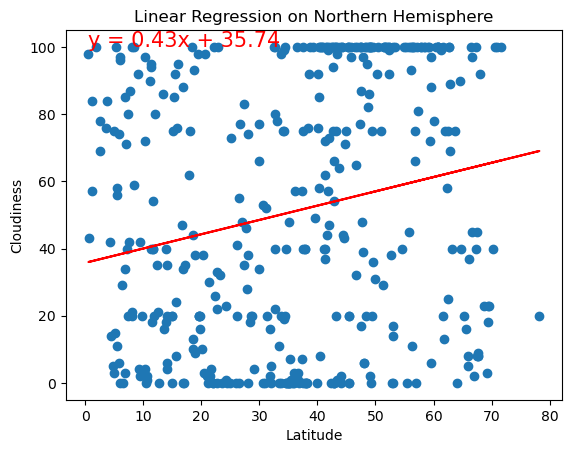

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Northern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.41079014122140334


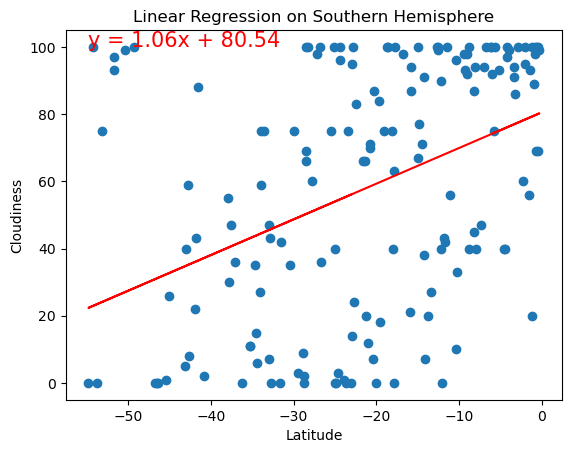

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
                            
# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Southern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013346500058857442


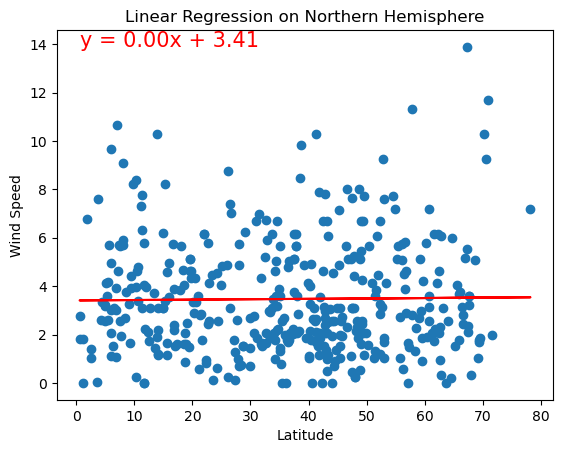

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Northern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: -0.23299929598869565


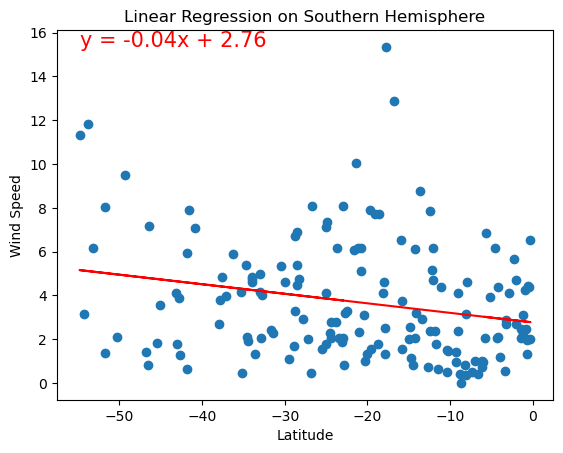

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept, rvalue,_,_ = linregress(x_values, y_values)
# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (min(x_values), max(y_values)), color="r", fontsize=15)
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE